In this notebook we use Python to draw [colorpleth maps](https://en.wikipedia.org/wiki/Choropleth_map) that report risk to assets, capacity, and resulting risk to welfare on a simpliied map of the Philippines.


## Get the Data

In [1]:
#The main library we use. Manipulates Excel-like tables (called dataframes) with named rows and columns
import pandas as pd

In [2]:
df_with_results = pd.read_csv("results/all_data_and_results.csv", index_col=0, skiprows=[0,2])
df_with_results.head()

,gdp_pc_pp,pop,pov_head,shew,gdp_pc_pp_nat,rel_gdp_pp,share1,axfin_p,axfin_r,social_p,...,delta_W,dcap,dcar,dKtot,deltaW_nat,dWpc_curency,risk,dWtot_currency,resilience,risk_to_assets
variable,,,,,,,,,,,,,,,,,,,,,
Abra,133.688,240135.244121,0.373595,0.953416,184.136685,0.726026,0.374005,0.693233,0.693233,0.408683,...,0.869330,22.810348,55.766692,304036.405163,0.000533,1.839209,0.013757,441658.916368,0.688396,0.009471
Agusan Del Norte,179.014,661728.454375,0.346715,0.821277,184.136685,0.972180,0.279308,0.496880,0.496880,0.388003,...,2.838321,57.578733,87.876092,3414174.995307,0.005329,6.753701,0.037727,4469115.928807,0.763949,0.028822
Agusan Del Sur,126.492,677779.682154,0.480785,0.821277,184.136685,0.686946,0.395282,0.475969,0.475969,0.388003,...,0.960239,44.157773,61.875558,906109.290996,0.001294,2.495839,0.019731,1691628.800840,0.535643,0.010569
Aklan,119.962,554414.442422,0.249662,0.823003,184.136685,0.651483,0.416799,0.660083,0.660083,0.432903,...,0.799232,28.103125,29.804007,3100174.259054,0.001028,8.942455,0.074544,4957826.085647,0.625309,0.046613
Albay,158.629,1264097.894966,0.409587,0.800000,184.136685,0.861474,0.315201,0.551314,0.551314,0.403794,...,0.066047,24.749336,34.266673,624770.654172,0.000207,0.740356,0.004667,935882.638915,0.667574,0.003116


## Map the data

The following library, coded for this project, allows to plot maps. To work proprerly, it requires that the free softaware [Inkspace](https://inkscape.org/en/download/) is installed on your computer. (Inkspace is used to transform [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics) maps into PDF and [png](https://en.wikipedia.org/wiki/Portable_Network_Graphics)

In [3]:
#this library contains ad hoc functions, coded for this project, that allow to produce maps 
from maps_lib import * 

In [4]:
#ploting capacities
import matplotlib.pyplot as plt 
#make plots appear in this notebook
%matplotlib inline  

#Default options for plots: 
#this controls the font used in the legend
font = {'family' : 'sans serif',
    'size'   : 22}
plt.rc('font', **font)

The [blank map of the Philippines](map/PHL_adm1.svg) we use here is an SVG.
<small> It was built strting from a [shapefile](https://en.wikipedia.org/wiki/Shapefile) from [GADM.org](http://gadm.org), that was simplified with  [mapshaper.org](http://mapshaper.org) then converted to SVG with [Kartograph](http://kartograph.org/)

In [5]:
# path to the blank map 
svg_file_path = "map/PHL_adm1.svg"

#### First block: risk to assets 

Missing in series: Batanes; Dinagat Islands; Metropolitan Manila; Misamis Occidental; Negros Oriental; Shariff Kabunsuan; Siquijor; Surigao Del Sur


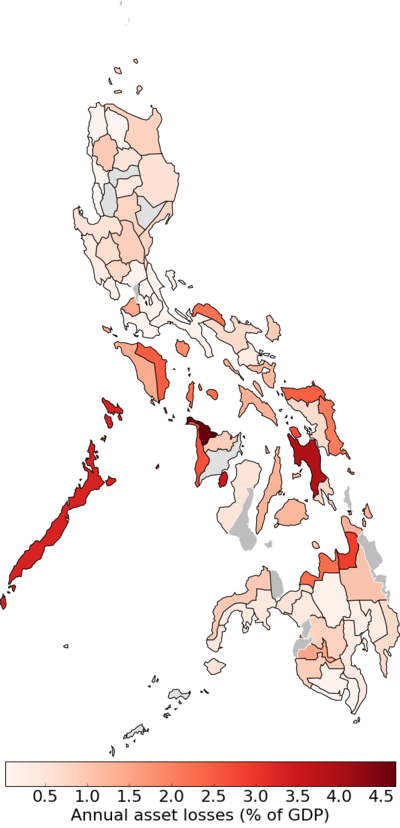

In [6]:
make_map_from_svg(
        df_with_results.risk_to_assets, #data 
        svg_file_path,                  #path to blank map
        outname="asset_risk",           #base name for output  (will vreate img/map_of_asset_risk.png, img/legend_of_asset_risk.png, etc.)
        color_maper=plt.cm.get_cmap("Reds"), #color scheme (from matplotlib. Chose them from http://colorbrewer2.org/)
        label="Annual asset losses (% of GDP)",
        new_title="Map of asset risk in the Philippines"  #title for the colored SVG
)

#### Second block: socio-economic capacity 

Missing in series: Batanes; Dinagat Islands; Metropolitan Manila; Misamis Occidental; Negros Oriental; Shariff Kabunsuan; Siquijor; Surigao Del Sur


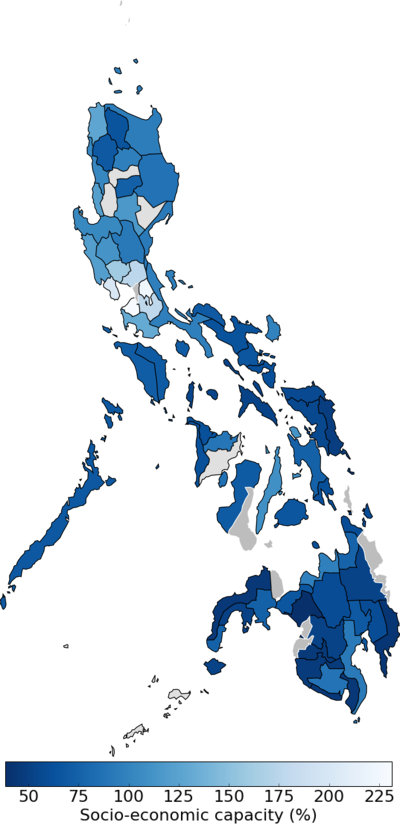

In [7]:
make_map_from_svg(
        df_with_results.resilience, 
        svg_file_path,
        outname="se_capacity", 
        color_maper=plt.cm.get_cmap("Blues_r"), 
        label="Socio-economic capacity (%)",
        new_title="Map of socio-economic capacity in the Philippines")

#### Total risk to welfare ($\frac {\text{asset risk}} {\text{socio-economic capacity}}$)

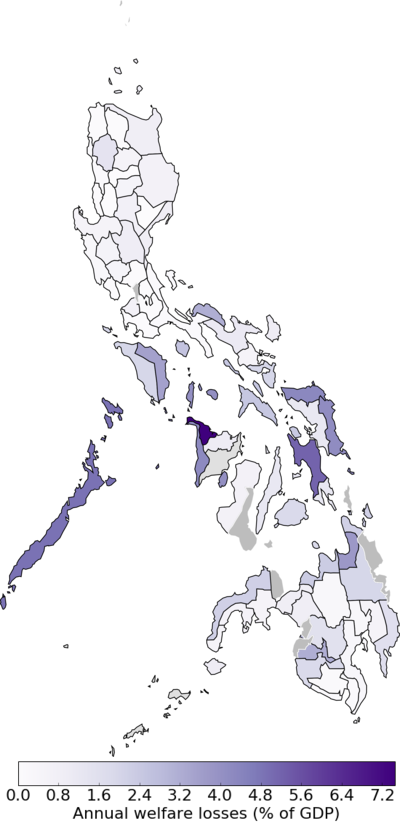

In [8]:
make_map_from_svg(
        df_with_results.risk, 
        svg_file_path,
        outname="welfare_risk", 
        color_maper=plt.cm.get_cmap("Purples"), 
        label="Annual welfare losses (% of GDP)",
        new_title="Map of welfare risk in the Philippines", verbose=False)